The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


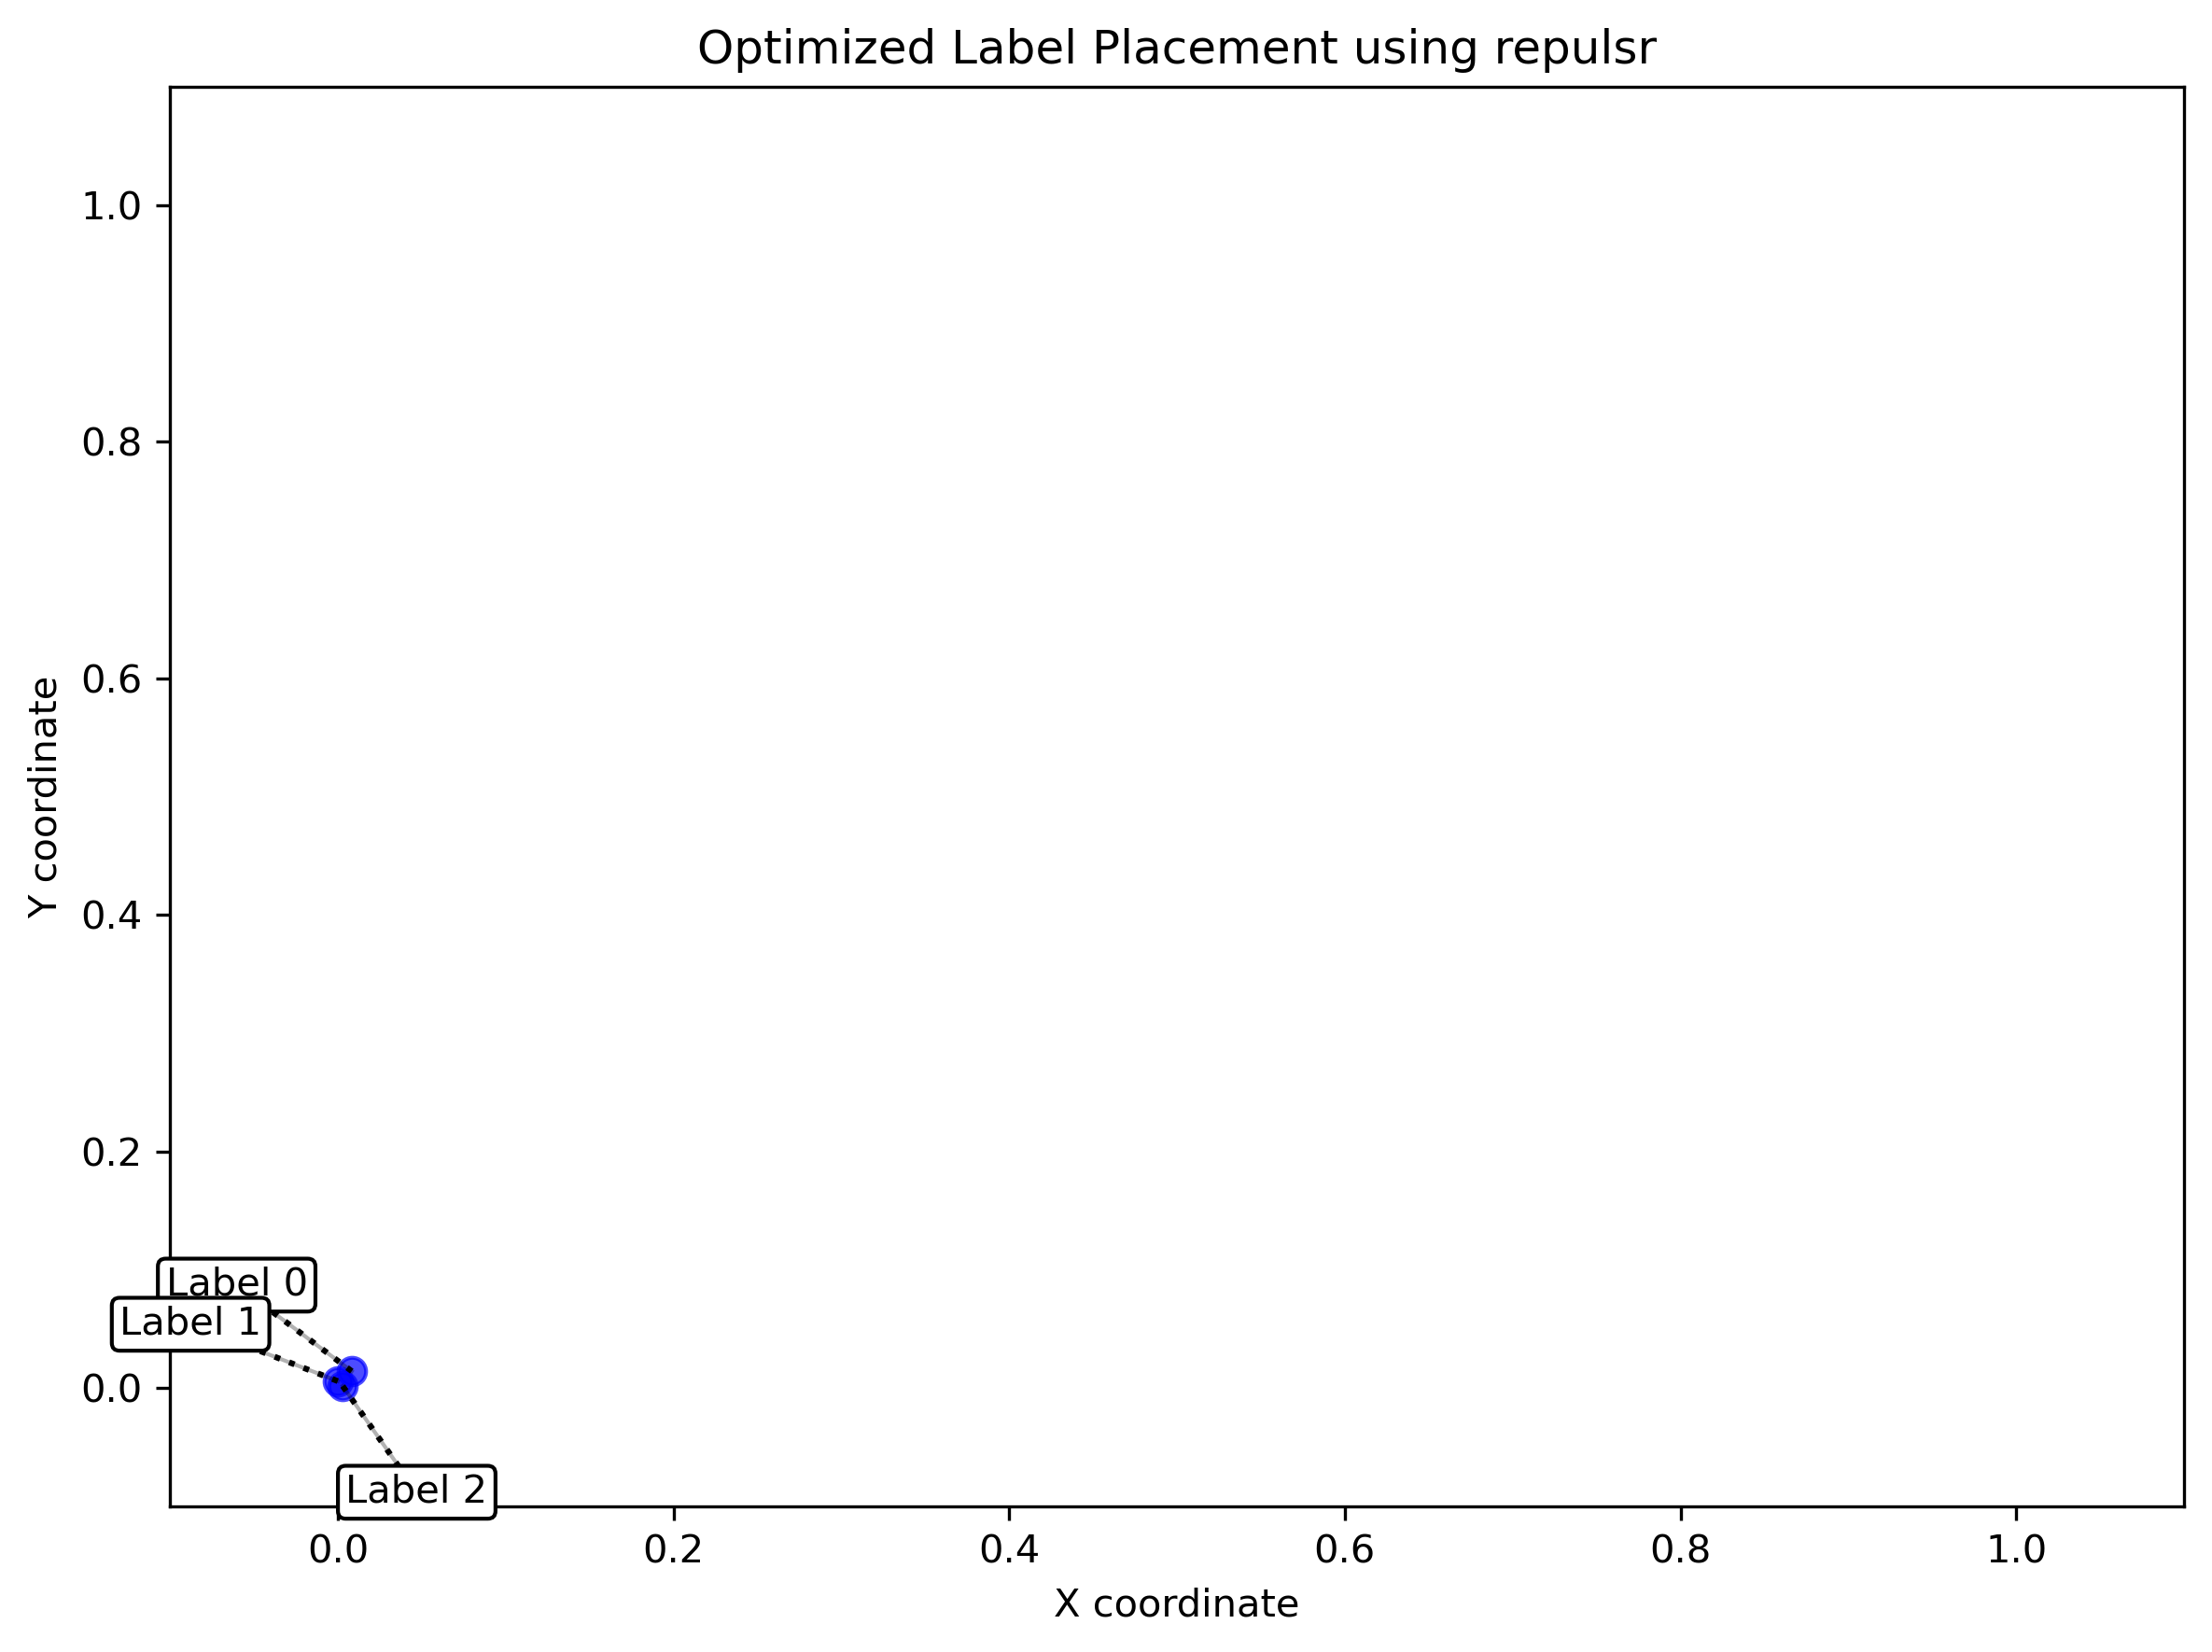

In [254]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from repulsr import optimize_box_positions
from scipy.spatial import distance_matrix

# Create some random points
np.random.seed(1)
n_points = 3
points = np.random.rand(n_points, 2)/50

# Create labels for each point
labels = [f'Label {i}' for i in range(n_points)]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Plot the original points
ax.scatter(points[:, 0], points[:, 1], s=50, color='blue', alpha=0.7)

# Define text and box styling parameters
text_kwargs = {'fontsize': 10}
bbox_kwargs = {'boxstyle': 'round,pad=0.2', 'facecolor': 'white', 'edgecolor': 'black'}
# bbox_kwargs = None

distances = distance_matrix(points, points)
closest_distances = np.sort(distances, axis=1)[:, 1]
mean_dist = np.mean(closest_distances)

# Apply the optimize_box_positions function
positions_history, energy_history = optimize_box_positions(
    ax,
    points,
    labels,
    sigma_label=mean_dist,
    sigma_point=mean_dist,
    max_distance=0.1,
    n_steps=100,
    step_size=0.01,
    text_kwargs=text_kwargs,
    bbox_kwargs=bbox_kwargs
)

# Draw lines from points to their labels
final_positions = positions_history[-1]
for i, (px, py) in enumerate(points):
    # Extract center position from box [x, y, width, height]
    lx, ly = final_positions[i][0], final_positions[i][1]
    ax.plot([px, lx], [py, ly], 'k-', alpha=0.3, linewidth=1)

positions_history = np.array(positions_history)
for i in range(len(points)):
    ax.plot(positions_history[:, i, 0], positions_history[:, i, 1], color='k', ls=':')

# Set plot limits and labels
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('Optimized Label Placement using repulsr')
# ax.grid(True, alpha=0.2)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

In [240]:
# TODO: I wonder if initialization of boxes could be better? At the very least, the shouldn't be initialized with overlap. 
# TODO: boxes around points should be initialized with the same size as the point size
# TODO: there should be a margin around figure limits
